## Exemple de classification de textes avec Scikit-learn
### Exemple rapide de classification
Un classificateur de textes en quelques lignes de code. Afin de simplifier l'exemple, on utilise le corpus 20 Newsgroups qui est disponible dans Scikit-learn.

Les fonctions/classes importantes sont: CountVectorizer, fit, transform, predict.

On décortique les différentes étapes dans le reste du notebook.

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

# On utilise le corpus 20Newsgroups et on limite les exemples d'entraînement à 4 classes
categories = ['rec.sport.hockey', 'sci.space', 'rec.autos', 'sci.med']
training_corpus = fetch_20newsgroups(subset='train', categories=categories, shuffle=True)

# On entraîne un classificateur (un modèle) avec le corpus d'entraînement
vectorizer = CountVectorizer(lowercase=True)
X_train = vectorizer.fit_transform(training_corpus.data)
y_train = training_corpus.target
dtree_classifier = DecisionTreeClassifier().fit(X_train, y_train)

# On teste le modèle avec deux petites phrases 
test_docs = ['Getzky was a center, not a goaltender', 'Mazda and BMW cars are esthetic',
            'Doctor, doctor, gimme the news', 'Take me to the moon']
X_test = vectorizer.transform(test_docs)

predicted = dtree_classifier.predict(X_test)

print("\nDes prédictions sur quelques phrases : ")
for doc, category in zip(test_docs, predicted):
    print('   {} ==> {}'.format(doc, training_corpus.target_names[category]))


Des prédictions sur quelques phrases : 
   Getzky was a center, not a goaltender ==> rec.sport.hockey
   Mazda and BMW cars are esthetic ==> rec.autos
   Doctor, doctor, gimme the news ==> sci.med
   Take me to the moon ==> sci.space


## La classe CountVectorizer
La classe CountVectorizer permet de convertir des textes en vecteurs de compte. Par défaut, elle extrait des attributs (feature extraction) qui correspondent aux mots du texte. On parle ici d'une représentation de texte sous forme de sac de mots (bag of words).

La méthode fit de cette classe permet de créer les attributs (features) qui, dans ce cas-ci, correspond au vocabulaire du corpus.

On utilise la méthode transform pour convertir les textes en vecteurs de compte (en sacs de mots). La méthode fit_transform permet de faire les 2 étapes en une seule opération.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ["How much wood does a woodchuck chuck",
          "if a woodchuck could chuck wood"]

vectorizer = CountVectorizer(lowercase=True)

vectorizer.fit(corpus) 
print("Attributs de classification: ", vectorizer.get_feature_names()) 
print("\nL'indice des attributs (leur position dans le vecteur de comptes) : \n", vectorizer.vocabulary_) 

corpus_vectors = vectorizer.transform(corpus) 
print("\nVecteurs de comptes pour les textes du corpus:\n", corpus_vectors.toarray())
 
text = "woodchuck if much wood"
text_vector = vectorizer.transform([text])
print("\nVecteur de comptes pour: {}\n{}".format(text, text_vector.toarray()))

Attributs de classification:  ['chuck', 'could', 'does', 'how', 'if', 'much', 'wood', 'woodchuck']

L'indice des attributs (leur position dans le vecteur de comptes) : 
 {'how': 3, 'much': 5, 'wood': 6, 'does': 2, 'woodchuck': 7, 'chuck': 0, 'if': 4, 'could': 1}

Vecteurs de comptes pour les textes du corpus:
 [[1 0 1 1 0 1 1 1]
 [1 1 0 0 1 0 1 1]]

Vecteur de comptes pour: woodchuck if much wood
[[0 0 0 0 1 1 1 1]]


On utilise le terme one hot vector pour désigner un vecteur qui représente 1 seul mot. Pas vraiment de bonne traduction de ce terme en français. Wikipedia suggère encodage one-hot.

In [3]:
one_word = "woodchuck"
one_hot_vector = vectorizer.transform([one_word])
print(one_hot_vector.toarray()) 

[[0 0 0 0 0 0 0 1]]


Par défaut, le CountVectorizer retire les mots outils du texte. On peut cependant désactiver cette option ou modifier la liste de mots outils (voir la documentation de scikit-learn).

In [4]:
two_words = "a woodchuck"
two_words_vector = vectorizer.transform([two_words])
print(two_words_vector.toarray()) # le mot "a" n'est pas dans la représentation du texte

[[0 0 0 0 0 0 0 1]]


Les attributs n'ont pas à être des mots uniques. Ils peuvent correspondent à des N-grammes de mots (par ex. des bigrammes). On peut même utiliser différentes valeurs de N pour construire nos attributs.

In [5]:
bigram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2))
bigram_vectorizer.fit(corpus)
print("\nAttributs bigrammes: ", bigram_vectorizer.get_feature_names())

multigram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 3))
multigram_vectorizer.fit(corpus)
print("\nAttributs multigrammes: ", multigram_vectorizer.get_feature_names())


Attributs bigrammes:  ['chuck wood', 'could chuck', 'does woodchuck', 'how much', 'if woodchuck', 'much wood', 'wood does', 'woodchuck chuck', 'woodchuck could']

Attributs multigrammes:  ['chuck', 'chuck wood', 'could', 'could chuck', 'could chuck wood', 'does', 'does woodchuck', 'does woodchuck chuck', 'how', 'how much', 'how much wood', 'if', 'if woodchuck', 'if woodchuck could', 'much', 'much wood', 'much wood does', 'wood', 'wood does', 'wood does woodchuck', 'woodchuck', 'woodchuck chuck', 'woodchuck could', 'woodchuck could chuck']


On peut également créer des attributs en utilisant les caractères au lieu des mots. Un exemple ici où on utilise des n-grammes de caractères.



In [6]:
character_ngrams_vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3))
character_ngrams_vectorizer.fit(corpus)
print("\nAttributs multigrammes: ", character_ngrams_vectorizer.get_feature_names())


Attributs multigrammes:  [' ', ' a', ' a ', ' c', ' ch', ' co', ' d', ' do', ' m', ' mu', ' w', ' wo', 'a', 'a ', 'a w', 'c', 'ch', 'ch ', 'chu', 'ck', 'ck ', 'co', 'cou', 'd', 'd ', 'd c', 'd d', 'dc', 'dch', 'do', 'doe', 'e', 'es', 'es ', 'f', 'f ', 'f a', 'h', 'h ', 'h w', 'ho', 'how', 'hu', 'huc', 'i', 'if', 'if ', 'k', 'k ', 'k c', 'k w', 'l', 'ld', 'ld ', 'm', 'mu', 'muc', 'o', 'od', 'od ', 'odc', 'oe', 'oes', 'oo', 'ood', 'ou', 'oul', 'ow', 'ow ', 's', 's ', 's a', 'u', 'uc', 'uch', 'uck', 'ul', 'uld', 'w', 'w ', 'w m', 'wo', 'woo']


Il existe d'autres classes, telles que TfidfVectorizer, qui permettent de convertir un texte en sac de mots. Voir la section du cours sur la Recherche d'information pour une définition des poids tfidf.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = "much woodchuck much wood "

tfidf_vectorizer = TfidfVectorizer(lowercase=True)
tfidf_vectorizer.fit(corpus)
text_vector = tfidf_vectorizer.transform([text])

rounded_tfidf = [round(x, 3) for x in text_vector.toarray()[0]]
print("\nVecteur tfidf pour: {}\n   {}".format(text, rounded_tfidf))


Vecteur tfidf pour: much woodchuck much wood 
   [0.0, 0.0, 0.0, 0.0, 0.0, 0.893, 0.318, 0.318]


## Classificateur naïf bayesien (Naive Bayes).
Un exemple de classification un peu plus élaboré que le précédent avec un modèle de type Naive Bayes.

On utilise pour cet exemple le problème de la catégorisation de questions. Cette tâche consiste à déterminer quel est le type d'une question. Par exemple:

- Qui est le président de la France ? ==> PERSON
- Où est la Tour Eiffel ==> LOCATION
- Comment faire de la soupe au pois ? ==> DESCRIPTION
- Que veut dire OMS ?  ==> ABBREVIATION

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Utilisation d'un corpus de données externes - des questions
# Le corpus est annoté, c.-à-d. nous avons les questions et les étiquettes associés aux questions
# Par exemple, LOCATION Where is John Wayne airport ?

questions_fn = "./data/questions-t3.txt"

def load_dataset(filename):
    with open(filename) as f:
        lines = f.read().splitlines()
        labels, questions = zip(*[tuple(s.split(' ', 1)) for s in lines])
    return questions, labels

questions, labels = load_dataset(questions_fn)

# Partionnement du corpus en données d'entraînement (train) et de test.
# X désigne les textes à classifier et y les étiquettes associés à ces textes. 
# Dans cet exemple, on garde 20% des questions pour les tests. 

X_train, X_test, y_train, y_test = train_test_split(questions, labels, test_size=0.2, shuffle=True)

# Le vectorizer permet de convertir les textes en sac de mots (vecteurs de compte)
vectorizer = CountVectorizer(lowercase=True)
vectorizer.fit(X_train)
print("\nNombre d'attributs de classification : ", len(vectorizer.get_feature_names()))

X_train_vectorized = vectorizer.transform(X_train)

# On construit un classificateur Naive Bayes sur les données d'entraînement
# Multinomial = possiblement plusieurs classes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)
print("Type de classificateur : ", nb_classifier)


Nombre d'attributs de classification :  7383
Type de classificateur :  MultinomialNB()


La distribution de probabilité à priori P(C) (en valeur logarithmique) des différentes classes de ce classificateur Naïve Bayes.



In [11]:
class_probs = list(zip(nb_classifier.classes_, nb_classifier.class_log_prior_))
for x, prob in class_probs:
    print("logprob({}) = {}".format(x, round(prob,2)))

logprob(ABBREVIATION) = -4.22
logprob(DEFINITION) = -2.34
logprob(DESCRIPTION) = -2.03
logprob(ENTITY) = -1.5
logprob(LOCATION) = -1.88
logprob(ORGANIZATION) = -3.38
logprob(PERSON) = -1.73
logprob(QUANTITY) = -2.05
logprob(TEMPORAL) = -3.16


Les probabilités P(word|C) (en valeur logarithmique) de quelques mots pour chacune des classe du modèle NB.



In [12]:
import pandas as pd

df = pd.DataFrame(vectorizer.get_feature_names(), columns =['Mots']) 
for i in range(len(nb_classifier.classes_)):
    df[nb_classifier.classes_[i]] = list(nb_classifier.feature_log_prob_[i])
question_words = ['how', 'what', 'when', 'where', 'which', 'who', 'whom', 'whose', 'why']
qw_probs = df[df['Mots'].isin(question_words)]
display(qw_probs)

,Mots,ABBREVIATION,DEFINITION,DESCRIPTION,ENTITY,LOCATION,ORGANIZATION,PERSON,QUANTITY,TEMPORAL
3318,how,-8.961238,-7.546024,-3.995327,-7.622052,-8.783932,-8.390723,-9.613803,-3.418723,-8.393556
7176,what,-4.771583,-3.215290,-3.803506,-2.876034,-3.363397,-4.347671,-3.874011,-4.349720,-4.742897
7182,when,-7.862625,-8.056849,-6.647688,-7.622052,-7.279855,-8.390723,-7.311218,-7.134731,-4.377173
7183,where,-8.961238,-9.155462,-7.022382,-8.315199,-4.125222,-8.390723,-8.515191,-7.645557,-8.393556
7184,which,-8.961238,-9.155462,-8.727130,-5.872852,-6.532641,-6.139431,-6.179816,-9.437317,-7.477265
7193,who,-8.961238,-5.466582,-8.033983,-7.303598,-8.783932,-6.518920,-3.524759,-8.744169,-9.086703
7196,whom,-8.961238,-8.462315,-9.420277,-9.701494,-9.477080,-8.390723,-7.311218,-9.437317,-9.086703
7198,whose,-8.961238,-9.155462,-9.420277,-9.701494,-9.477080,-9.083870,-6.905753,-9.437317,-9.086703
7199,why,-8.961238,-8.056849,-5.001436,-9.701494,-9.477080,-9.083870,-9.613803,-9.437317,-9.086703


In [13]:
clue_words = ['person', 'king', 'president', 'author', 'company', 'university', 'waterfall', 'animal', 
                  'country', 'city', 'date', 'year', 'distance', 'far', 'long', 'height', 
                  'located', 'stand', 'mean']
w_probs = df[df['Mots'].isin(clue_words)]
print("\nLes probabilités de mots qui sont présents dans certains types de question : ")
display(w_probs)


Les probabilités de mots qui sont présents dans certains types de question : 


,Mots,ABBREVIATION,DEFINITION,DESCRIPTION,ENTITY,LOCATION,ORGANIZATION,PERSON,QUANTITY,TEMPORAL
478,animal,-8.961238,-9.155462,-9.420277,-6.705761,-9.477080,-9.083870,-9.613803,-8.744169,-9.086703
653,author,-8.961238,-9.155462,-8.727130,-9.701494,-9.477080,-9.083870,-7.416579,-9.437317,-9.086703
1418,city,-8.961238,-9.155462,-8.321665,-8.092056,-5.082631,-8.390723,-8.004366,-8.338704,-9.086703
1561,company,-8.268091,-9.155462,-8.321665,-8.602881,-8.783932,-5.472952,-8.227509,-9.437317,-8.393556
1719,country,-8.961238,-8.462315,-8.321665,-9.008347,-4.912731,-8.390723,-8.515191,-8.338704,-9.086703
1867,date,-8.961238,-9.155462,-8.321665,-9.008347,-8.783932,-9.083870,-9.613803,-8.744169,-6.378653
2064,distance,-8.961238,-9.155462,-9.420277,-9.008347,-9.477080,-8.390723,-9.613803,-8.338704,-9.086703
2537,far,-8.961238,-9.155462,-9.420277,-9.008347,-9.477080,-9.083870,-9.613803,-7.039421,-9.086703
3182,height,-8.961238,-9.155462,-9.420277,-9.701494,-9.477080,-9.083870,-9.613803,-8.744169,-9.086703
3727,king,-8.961238,-7.769167,-8.321665,-8.315199,-7.685320,-9.083870,-6.974746,-8.338704,-8.393556


In [14]:
other_words = ['the', 'is', 'are', 'for', 'the', 'each', 'some', 'did', 'to', 'that']
other_probs = df[df['Mots'].isin(other_words)]
print("\nLes probabilités de mots qui ne sont probalement pas de bons indices : ")
display(other_probs)


Les probabilités de mots qui ne sont probalement pas de bons indices : 


,Mots,ABBREVIATION,DEFINITION,DESCRIPTION,ENTITY,LOCATION,ORGANIZATION,PERSON,QUANTITY,TEMPORAL
557,are,-8.961238,-5.491900,-5.528457,-5.168894,-5.451728,-6.598963,-6.841215,-4.701118,-7.700408
2006,did,-8.961238,-7.769167,-5.528457,-5.384006,-5.739410,-6.250656,-6.435750,-5.799730,-4.852596
2215,each,-8.961238,-9.155462,-9.420277,-8.602881,-8.783932,-9.083870,-8.515191,-6.952410,-9.086703
2718,for,-5.223568,-6.670555,-5.488451,-5.168894,-5.980572,-6.139431,-5.553360,-5.448333,-7.140793
3534,is,-5.703141,-3.527841,-4.332681,-3.905436,-3.916398,-5.587362,-4.616591,-4.313353,-5.754498
6157,some,-8.961238,-9.155462,-7.474367,-7.303598,-7.867642,-9.083870,-8.515191,-9.437317,-9.086703
6634,that,-8.961238,-8.462315,-6.935370,-5.872852,-6.769029,-6.685974,-6.355707,-7.491406,-8.393556
6636,the,-5.297676,-4.280264,-3.512194,-3.140463,-3.152721,-4.365371,-3.069892,-3.573685,-4.290912
6714,to,-8.268091,-7.076020,-4.815107,-4.767020,-5.382735,-6.598963,-4.877605,-5.342972,-6.784118


## Évaluation d'un modèle
Tout d'abord, on fait l'évaluation de la performance du modèle sur les données d'entraînement à l'aide d'une validation croisée.

In [15]:
from sklearn.metrics import precision_score, recall_score, accuracy_score 
from sklearn.model_selection import cross_val_score

def cross_validation(classifier, X, y):
    scores = cross_val_score(classifier, X, y, cv=5)
    print("\nÉvaluation par validation croisée (en entraînement) : ")
    print("   Exactitude (accuracy) sur chaque partition", scores)
    print("   Exactitude moyenne: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    
cross_validation(nb_classifier, X_train_vectorized, y_train)


Évaluation par validation croisée (en entraînement) : 
   Exactitude (accuracy) sur chaque partition [0.69403825 0.67379078 0.68278965 0.66366704 0.69256757]
   Exactitude moyenne: 0.68 (+/- 0.02)


Par la suite, on fait l'évaluation du modèle avec les données de test qu'on a mis de côté dès le début de notre expérimentation (X_test et y_test). Cette étape nous permet de valider si notre modèle est capable de bien performer sur des données qu'il n'a pas vues à l'entraînement.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format ='retina'

X_test_vectorized = vectorizer.transform(X_test)

# Evaluation de l'algorithme sur X_test vectorized et y_test
def hold_out_evaluation(classifier, X, y_true):
    y_pred = classifier.predict(X)
    print("\nÉvaluation sur les données de tests")
    print("   Accuracy = ", accuracy_score(y_true, y_pred))
    print("   Macro rappel (recall) = ", recall_score(y_true, y_pred, average='macro'))
    print("   Macro précision = ", precision_score(y_true, y_pred, average='macro'))
    print("   Micro rappel (recall) = ", recall_score(y_true, y_pred, average='micro'))
    print("   Micro précision = ", precision_score(y_true, y_pred, average='micro'))

hold_out_evaluation(nb_classifier, X_test_vectorized, y_test)


Évaluation sur les données de tests
   Accuracy =  0.6915467625899281
   Macro rappel (recall) =  0.5404497115284065
   Macro précision =  0.8455716598875157
   Micro rappel (recall) =  0.6915467625899281
   Micro précision =  0.6915467625899281


On peut également afficher la matrice de confusion (contingence) pour voir quelles sont les erreurs les plus fréquentes.




Matrice de confusion
 [[  5   1   1  13   0   0   1   0   0]
 [  0  15   2  59  12   0  10   1   0]
 [  0   0  99  38  11   0   0  10   0]
 [  0   0  12 205   9   0  20   8   0]
 [  0   0   1  19 154   0   3   1   0]
 [  0   0   0  22   3   3   9   0   0]
 [  0   0   2  19   2   0 169   0   0]
 [  0   0   4  17   6   0   1  99   0]
 [  0   0   1  10   0   0  14   1  20]]


Version graphique de la matrice de confusion


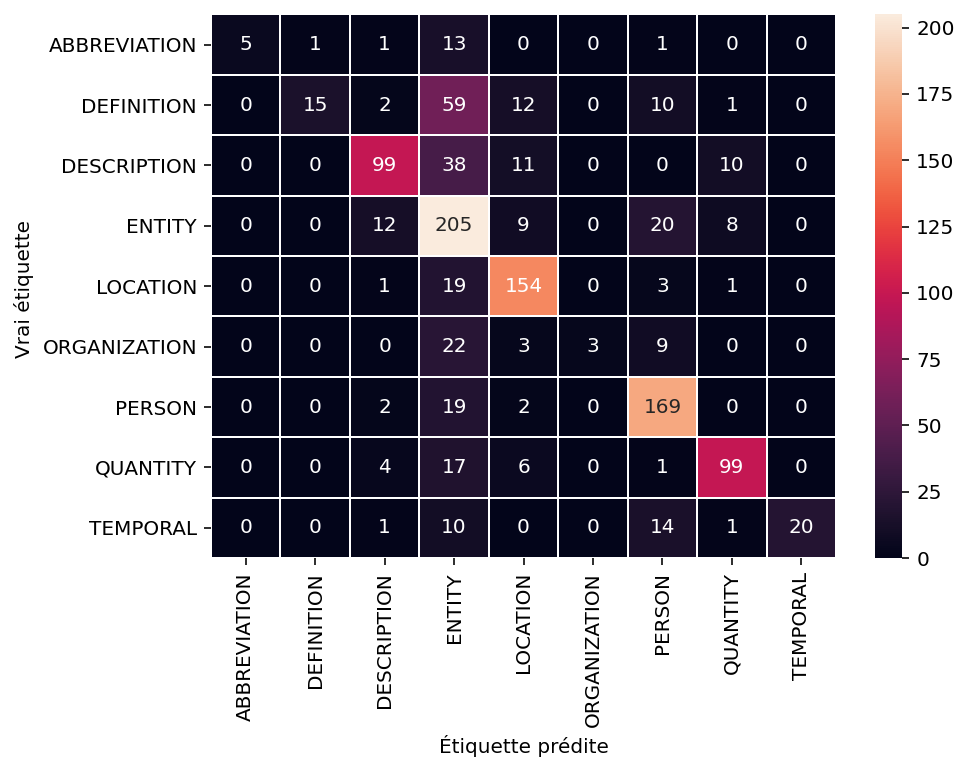

In [19]:
#Matrice de confusion
from sklearn.metrics import confusion_matrix

y_pred = nb_classifier.predict(X_test_vectorized)
cm = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion\n", cm)

# Affichage graphique plus informatif avec Seaborne
def display_confusion_matrix(confusion_matrix, classes):
    print("\n\nVersion graphique de la matrice de confusion") 
    df_cm = pd.DataFrame(confusion_matrix, index=classes, columns=classes)
    f, ax = plt.subplots(figsize=(7, 5))
    sns.heatmap(df_cm, annot=True, fmt="d", linewidths=.5, ax=ax)
    plt.ylabel('Vrai étiquette ')
    plt.xlabel('Étiquette prédite')
    
classes = nb_classifier.classes_
display_confusion_matrix(cm, classes)

On peut faire une recherche par grille (grid search) pour déterminer les paramètres d'un mod

In [20]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

grid_search = GridSearchCV(nb_classifier, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train_vectorized, y_train)
best_parameters = grid_search.best_estimator_.get_params()
print("\nParamètres sélectionnés par grid search: ", best_parameters)

hold_out_evaluation(grid_search, X_test_vectorized, y_test)


Paramètres sélectionnés par grid search:  {'alpha': 0.3, 'class_prior': None, 'fit_prior': True}

Évaluation sur les données de tests
   Accuracy =  0.737410071942446
   Macro rappel (recall) =  0.6594829877116969
   Macro précision =  0.8151726336230533
   Micro rappel (recall) =  0.737410071942446
   Micro précision =  0.737410071942446


## Classificateur de type Régression logistique
On refait la même démarche avec un classificateur de type Régression logistique. De plus, on réutilise les données et le vectorizer de l'exemple précédent.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logit_classifier = LogisticRegression(max_iter=200)
cross_validation(logit_classifier, X_train_vectorized, y_train)


Évaluation par validation croisée (en entraînement) : 
   Exactitude (accuracy) sur chaque partition [0.80764904 0.80539933 0.78965129 0.78965129 0.81306306]
   Exactitude moyenne: 0.80 (+/- 0.02)


Évaluation de **l'exactitude du modèle** sur les **données de test**



In [22]:
logit_classifier.fit(X_train_vectorized, y_train)
hold_out_evaluation(logit_classifier, X_test_vectorized, y_test)



Évaluation sur les données de tests
   Accuracy =  0.8201438848920863
   Macro rappel (recall) =  0.7708336728934726
   Macro précision =  0.8629513862590842
   Micro rappel (recall) =  0.8201438848920863
   Micro précision =  0.8201438848920863


Voici les poids du classificateur pour les mêmes mots que ceux étudiés dans la partie Naive Bayes. Regarder l'importance relative de certains mots qui est grande pour certaines classes. Par exemple:

* where a un poids de 4.3 pour la classe LOCATION .
* when a un poids de 3.4 pour la classe TEMPORAL .
* who a un poids de 3.3 pour la classe PERSON .
* company a un poids de 3.5 pour la classe ORGANIZATION .

À noter également les poids plus faibles des mots du 3e groupe, des mots qui comportent moins de signification. Prenez quelques secondes pour comparer les probabilités et les poids des mots is et the. Ceci illustre bien la différentece entre les classificateurs Naive Bayes et Régression logistique.

In [23]:
import pandas as pd

df = pd.DataFrame(vectorizer.get_feature_names(), columns =['Mots']) 
for i in range(len(logit_classifier.classes_)):
    df[logit_classifier.classes_[i]] = list(logit_classifier.coef_[i])
question_words = ['how', 'what', 'when', 'where', 'which', 'who', 'whom', 'whose', 'why']
qw_weigths = df[df['Mots'].isin(question_words)]
display(qw_weigths)

clue_words = ['person', 'king', 'president', 'author', 'company', 'university', 'waterfall', 'animal', 
                  'country', 'city', 'date', 'year', 'distance', 'far', 'long', 'height', 
                  'located', 'stand', 'mean']
w_weights = df[df['Mots'].isin(clue_words)]
display(w_weights)

other_words = ['the', 'is', 'are', 'for', 'the', 'each', 'some', 'did', 'to', 'that']
other_weights = df[df['Mots'].isin(other_words)]
display(other_weights)

,Mots,ABBREVIATION,DEFINITION,DESCRIPTION,ENTITY,LOCATION,ORGANIZATION,PERSON,QUANTITY,TEMPORAL
3318,how,-0.278939,-0.623078,3.006079,-0.750050,-1.432709,-0.584186,-1.367641,3.216552,-1.186028
7176,what,0.935053,0.735267,-0.466561,1.079046,-0.044035,-0.058802,-0.451582,-0.320915,-1.407470
7182,when,0.193485,-0.782459,-0.171262,-0.896310,-0.414134,-0.431725,-0.753740,-0.355612,3.611757
7183,where,-0.161845,-1.283110,-0.498360,-0.693886,4.232761,-0.390342,-0.619494,0.245564,-0.831287
7184,which,-0.149092,-0.740804,-1.035566,1.303027,0.131570,0.839066,0.760734,-0.823383,-0.285552
7193,who,-0.237966,1.616572,-1.412321,-0.675818,-1.383531,1.043555,3.404494,-1.094945,-1.260042
7196,whom,-0.028248,0.093045,-0.382441,-0.634882,-0.250981,0.124113,1.459259,-0.120299,-0.259567
7198,whose,-0.013105,-0.290902,-0.293928,-0.376155,-0.216584,-0.081611,1.681469,-0.160309,-0.248875
7199,why,-0.096979,0.120593,3.455953,-0.930382,-0.582379,-0.288179,-0.644058,-0.542690,-0.491879


,Mots,ABBREVIATION,DEFINITION,DESCRIPTION,ENTITY,LOCATION,ORGANIZATION,PERSON,QUANTITY,TEMPORAL
478,animal,-0.044647,-4.090362e-01,-0.516967,2.203449,-0.667403,-0.130888,-0.510882,0.123294,-0.046920
653,author,-0.007521,-6.808313e-02,-0.122018,-0.441676,-0.133475,-0.064377,0.938745,-0.063597,-0.037998
1418,city,-0.144803,-6.168449e-01,-0.557192,-0.746271,3.213531,-0.281801,-0.350664,-0.310603,-0.205352
1561,company,0.288968,-7.035606e-01,-0.508867,-0.880562,-0.748035,3.637876,-0.375483,-0.632032,-0.078305
1719,country,-0.163694,-2.678897e-01,-0.737908,-1.254182,3.717427,0.157772,-0.599154,-0.406094,-0.446277
1867,date,-0.094171,-6.890504e-01,-0.044279,-0.686138,-0.312212,-0.090933,-0.390954,-0.394246,2.701982
2064,distance,-0.005861,-3.060340e-02,-0.035029,0.051914,-0.054222,0.135798,-0.078407,0.021695,-0.005286
2537,far,-0.004247,-8.515342e-02,-1.032496,-0.028322,-0.117587,-0.014490,-0.061708,1.355435,-0.011431
3182,height,-0.000002,-5.742288e-07,-0.000304,-0.000024,-0.000011,-0.000003,-0.000026,0.000384,-0.000014
3727,king,-0.131233,-6.008774e-03,-0.424742,-0.178028,0.043789,-0.233599,0.748750,-0.111590,0.292662


,Mots,ABBREVIATION,DEFINITION,DESCRIPTION,ENTITY,LOCATION,ORGANIZATION,PERSON,QUANTITY,TEMPORAL
557,are,-0.521959,1.471740,0.314851,-0.171460,-0.000314,-0.027041,-1.147679,0.305976,-0.224115
2006,did,-0.407001,-0.595217,0.362276,0.209464,-0.362353,0.252728,-0.584718,-0.244776,1.369598
2215,each,-0.023176,-0.038259,-0.153326,-0.031031,-0.018215,-0.046717,0.082845,0.482247,-0.254367
2718,for,1.091679,-1.403403,0.510646,0.193774,-0.540737,0.291773,-0.221407,0.539343,-0.461668
3534,is,1.087064,1.817436,-0.380754,-0.766374,-0.168607,-0.970545,-1.032774,0.522262,-0.107708
6157,some,-0.054858,-0.579419,-0.106028,0.465326,0.662702,-0.232968,0.192860,-0.294632,-0.052984
6634,that,-0.226370,-0.978611,-0.034083,0.944186,-0.209060,0.718437,0.016244,-0.027035,-0.203708
6636,the,-0.226133,-0.643678,0.311217,-0.120300,0.197105,0.044772,0.007252,0.293547,0.136218
6714,to,-0.258328,-1.100032,0.962237,0.476103,0.177135,-0.303784,0.351608,0.103022,-0.407961


In [24]:
X_test_vectorized = vectorizer.transform(X_test)
hold_out_evaluation(logit_classifier, X_test_vectorized, y_test)


Évaluation sur les données de tests
   Accuracy =  0.8201438848920863
   Macro rappel (recall) =  0.7708336728934726
   Macro précision =  0.8629513862590842
   Micro rappel (recall) =  0.8201438848920863
   Micro précision =  0.8201438848920863




Version graphique de la matrice de confusion


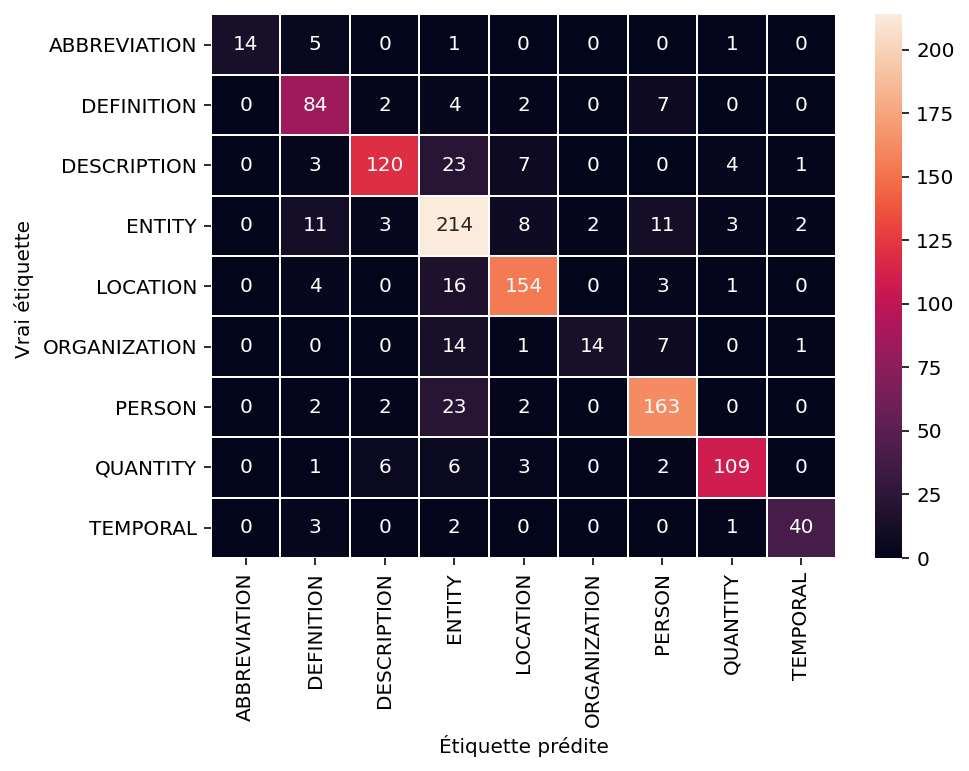

In [25]:
y_pred = logit_classifier.predict(X_test_vectorized)
cm = confusion_matrix(y_test, y_pred)
classes = logit_classifier.classes_
display_confusion_matrix(cm, classes)